# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [5]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Reading and Understanding the Data

In [6]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0
cluster labels,50.0,0.880,0.824126,0.0,0.000,1.00,2.000,2.0


In [9]:
# Missing Values

df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

There are No Missing values in the dataset.

In [10]:
#renaming columns

df = df.rename( columns={'Unnamed: 0':'State'})

df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Exploratory Data Analysis

**1) Murder Rate**

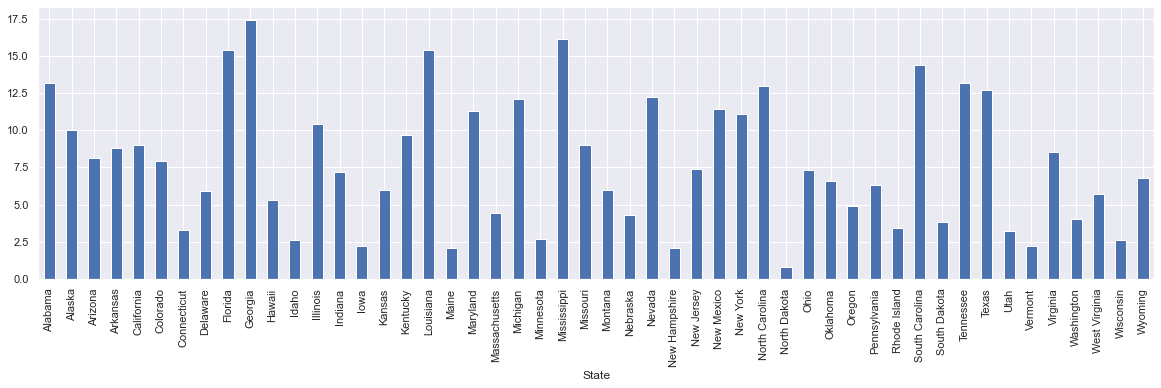

In [11]:
plt.figure(figsize=(20,5))
df.groupby('State')['Murder'].max().plot(kind='bar')

**Observations:**
<li>Highest Murder Rate : Georgia and Missisippi
<li>Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.

**2) Assault Rate**

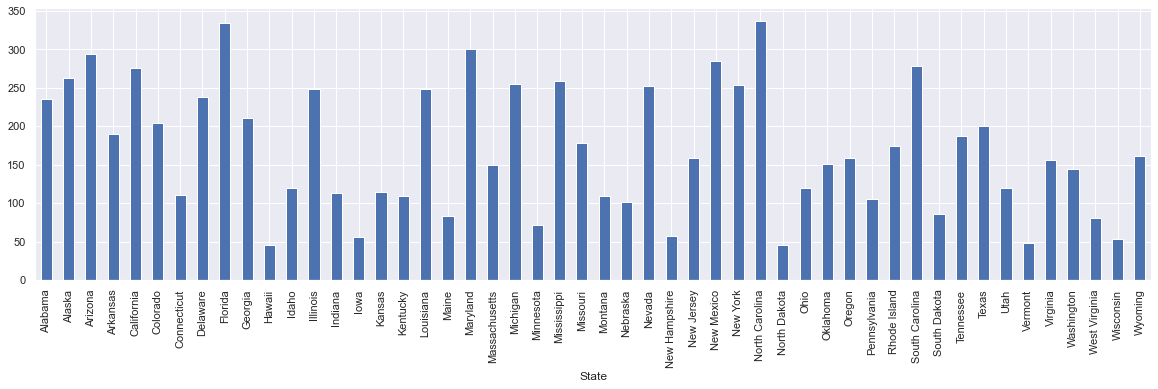

In [12]:
plt.figure(figsize=(20,5))
df.groupby('State')['Assault'].max().plot(kind='bar')

**Observations:**
<li>Highest Assualt Rate : Florida and North California.
<li>Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.

**3) Rape Rate**

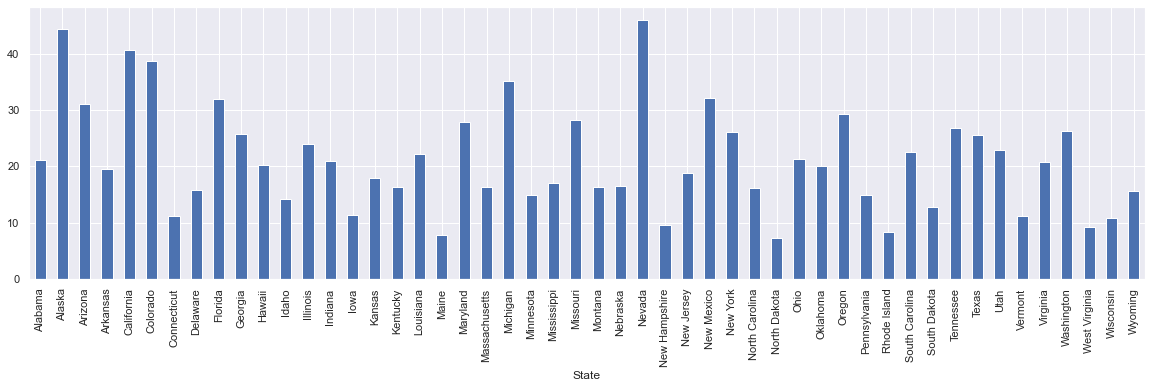

In [13]:
plt.figure(figsize=(20,5))
df.groupby('State')['Rape'].max().plot(kind='bar')

**Observations:**
<li>Highest UrbanPop Rate : Nevada and Alaska.
<li>Lowest UrbanPop Rate : Maine, North Dakota, Vermont, Connecticut, New Hampshire, Wisconsin, Rhode Island and West Virginia

**4) UrbanPop : Percent Urban Population**

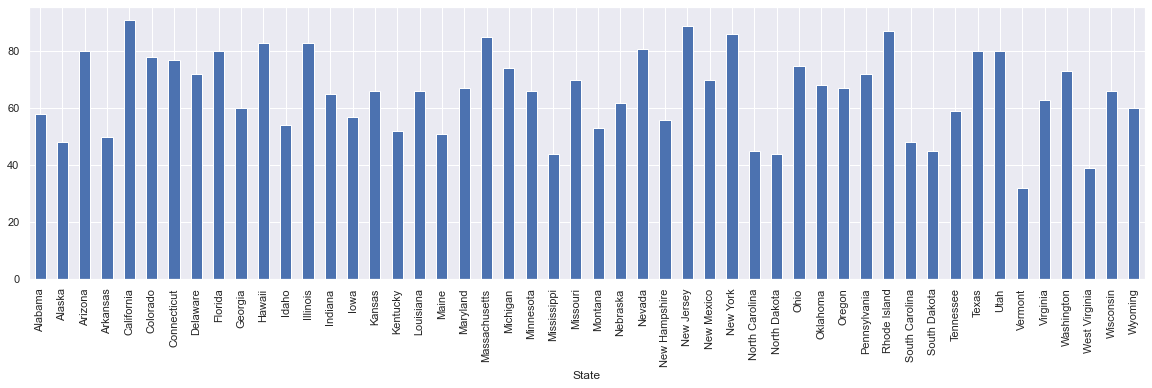

In [14]:
plt.figure(figsize=(20,5))
df.groupby('State')['UrbanPop'].max().plot(kind='bar')

# Scatter plot

With respect to Percent Urban Population 

**1) Murder Rate**

Text(0, 0.5, 'Murder Rate')

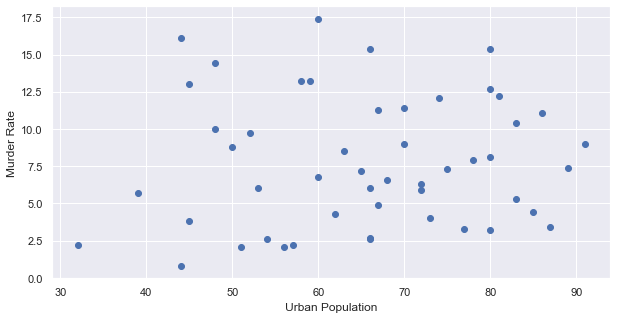

In [15]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

**2) Rape Rate**

Text(0, 0.5, 'Rape Rate')

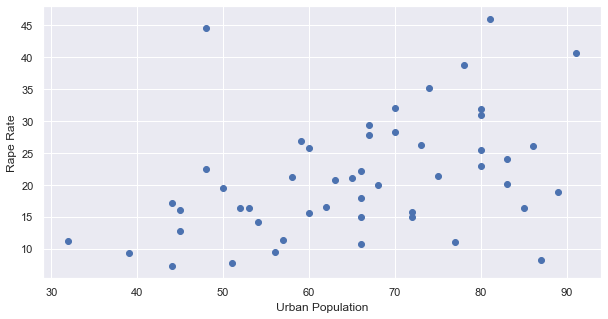

In [16]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

**3) Assault Rate**

Text(0, 0.5, 'Assault Rate')

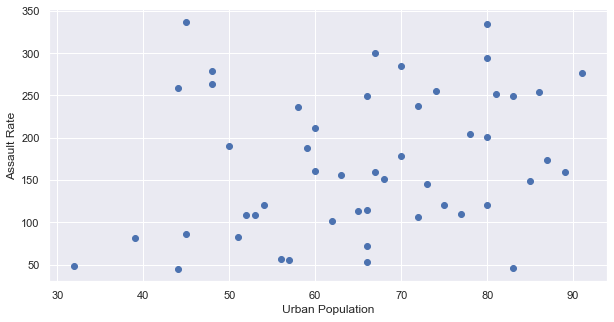

In [17]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

<li>The Urban Population has a linear Relationship with Murder, Rape and Assault Rate.
<li>With the increase in Urban Polutaion the Rate of Murder, Rape and Assault also increases.

# Scaling Data

In [18]:
data = df.iloc[:,1:].values

In [19]:
scaled_data = scaler.fit_transform(data)

# Dendogram with different types of Linkages: 

### 1) Single Linkage:

Text(0, 0.5, 'Euclidean distances')

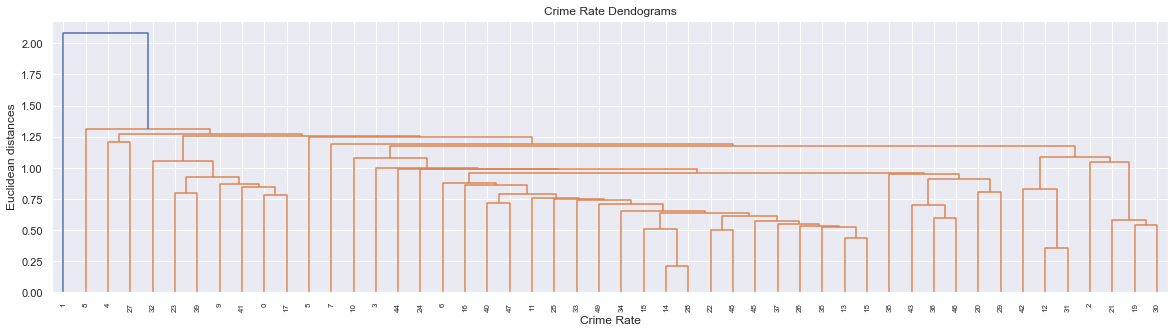

In [20]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### 2) Complete Linkage:

Text(0, 0.5, 'Euclidean distances')

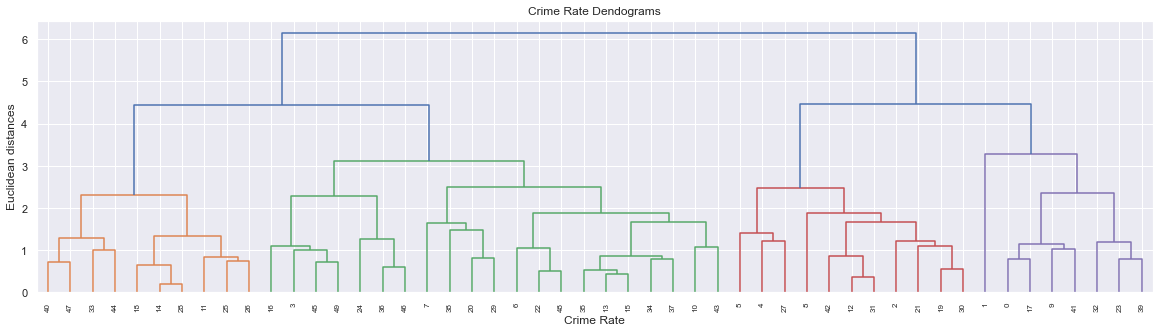

In [21]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### 3) Average Linkage:

Text(0, 0.5, 'Euclidean distances')

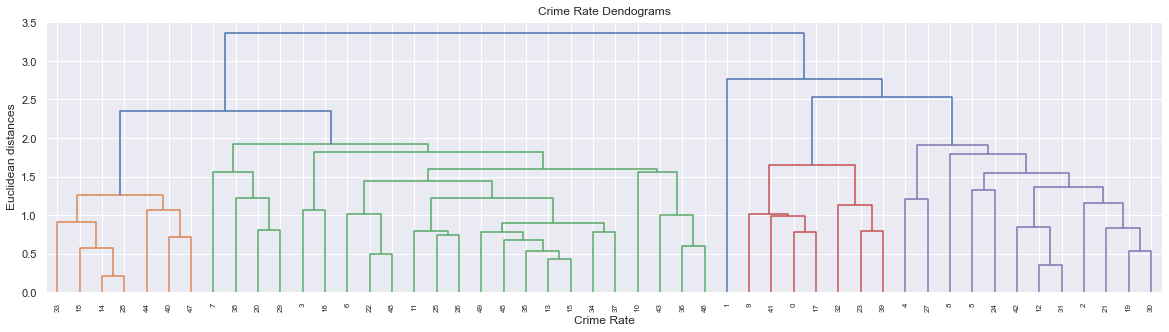

In [22]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

<li>The single linkage type will produce dendrograms which are not structured properly.
<li>Whereas complete or average linkage will produce clusters which have a proper tree-like structure.

### 4) Ward Linkage:

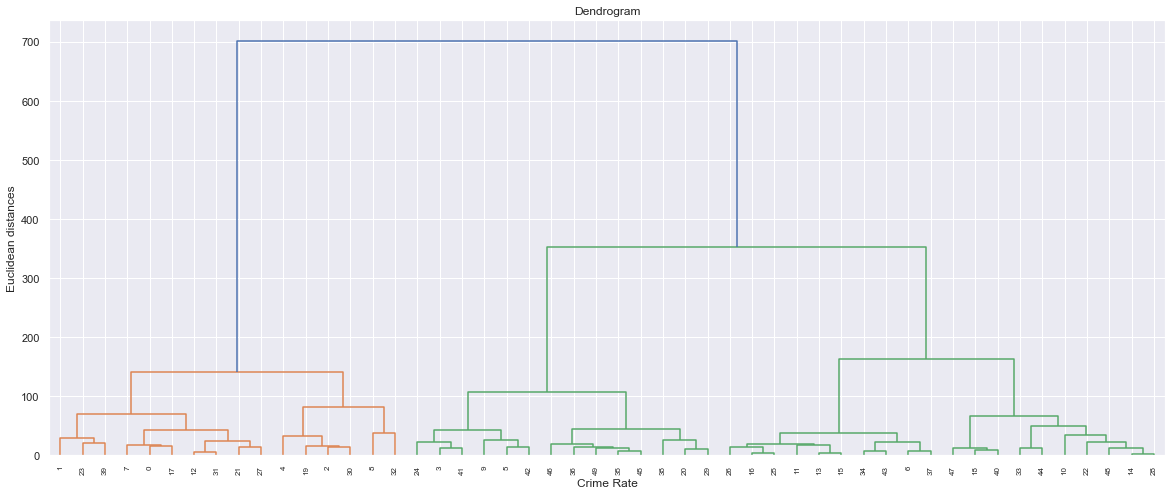

In [23]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

Ward method is actually a method that tries to minimize the variance within each cluster.

In [42]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [43]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [26]:
# Fetch the cluster labels
df['cluster labels']= y_pred

In [27]:
# Let's see which State falls in which cluster
df[['State','cluster labels']]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


# Cluster Analysis

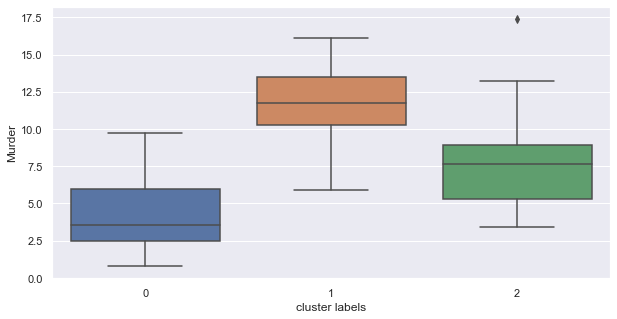

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=df)

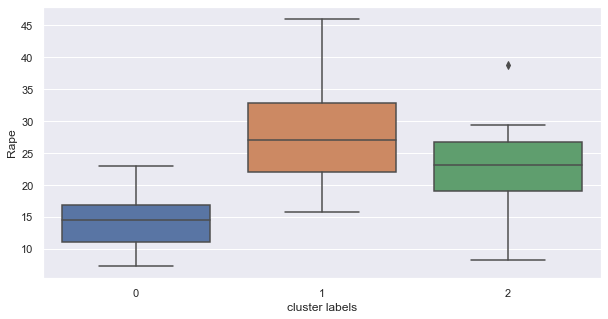

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=df)

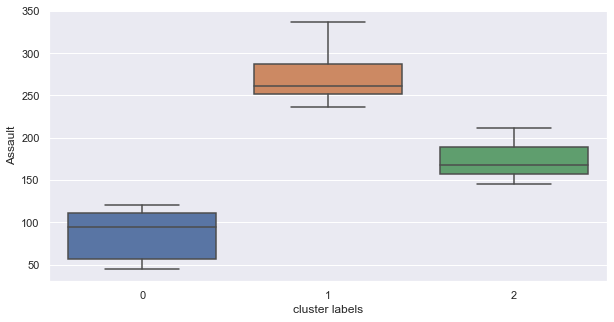

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=df)

**Observations:**

<li>The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders, Assaults and Rapes.
<li>The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
<li>The Cities in Cluster-2 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

## Finding Safe, Moderate and Danger Zones.

In [31]:
Safe_Zone= df.groupby('cluster labels')['State'].unique()[0]
Safe_Zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [32]:
Danger_Zone= df.groupby('cluster labels')['State'].unique()[1]
Danger_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [33]:
Moderate_Zone= df.groupby('cluster labels')['State'].unique()[2]
Moderate_Zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

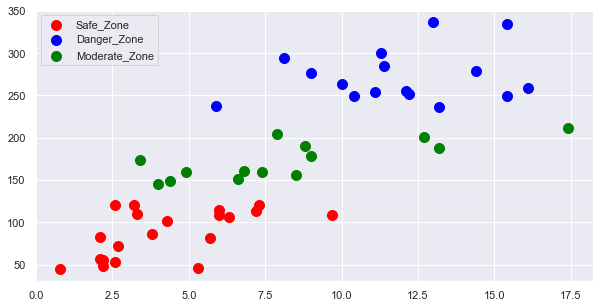

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()

<li> The First (Red) and Third (Green) cluster is for Safe Zones and Moderate Zones.
<li> The Second cluster (Blue) is for Danger Zones. </Br>

<li> We can observe that the Safe and Moderate zones are relatively less.
<li> Whereas the blue zones i.e. the Danger zones are more in number.